1. 'npa2020.csv'의 'RECV_CPLT_TM(접수완료시간)' 컬럼은 본래 여섯 자리로, 여섯 자리가 아닌 경우 앞에 0을 붙여 여섯 자리로 만들어 해석해야 합니다.  
7의 경우 000007 -> 오전 00시 00분 07초  
39의 경우 000039 -> 오전 00시 00분 39초  
132의 경우 000132 -> 오전 00시 01분 32초  
1041의 경우 001041 -> 오전 00시 10분 41초  
10216의 경우 010216 -> 오전 01시 02분 16초  

2. KP2020.csv 데이터와 NPA2020.csv 데이터는 컬럼 정의 방식 및 기간의 차이일 뿐, 데이터 간 차이는 없습니다.

3. SME_EVT_YN (동일사건여부)  
-> 같은 날 동일한 사건에 대해 신고 재접수가 이루어진 경우를 의미하며, <Y / N / 공란/ NaN> 값으로 표기  
Y : YES (재접수 O)  
N 및 공란 : NO (재접수 X)  
NaN : 알 수 없음

4. 접수부서코드 및 발생지점과 경찰청구분이 다른 경우  
-> 신고가 이관된 것을 의미합니다.  
예) 대전에 사는 신고자가 전북에 있는 친구와 연락이 닿지 않아 신고한 경우 (접수부서코드 : 대전청 / 경찰청 구분 : 전북청)

In [1]:
import matplotlib_hangul

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import folium

In [2]:
kp20 = pd.read_csv('data/KP2020.csv',encoding = 'cp949')
kp21 = pd.read_csv('data/KP2021.csv',encoding = 'cp949')
npa20 = pd.read_csv('data/NPA2020.csv',encoding = 'cp949')
cds = pd.read_csv('data/충청대전세종.csv',encoding = 'utf-8')
acc = pd.read_csv('data/충대세_사고다발지역.csv',encoding = 'cp949')

light_cn = pd.read_csv('data/충청남도 천안시_가로등 현황_20220705.csv', encoding='cp949')
camera_cn = pd.read_csv('data/충청남도_천안시_무인교통단속카메라_20220701.csv', encoding='cp949')
traf_cn = pd.read_csv('data/충청남도_천안시_신호등_20220627.csv', encoding='cp949')
parking_cn = pd.read_csv('data/천안시 두정동 주차장.csv', encoding='utf-8')
cds_c = pd.read_csv('data/충청남도 천안시.csv', encoding='utf-8')

In [3]:
kp20 = kp20.set_axis(['접수부서','접수완료일시','경찰청','사건상태','사건종별','신고자성별','발생지점','경도','위도','동일사건발생'],axis='columns')
kp21 =  kp21.set_axis(['접수부서','접수완료일시','경찰청','사건상태','사건종별','신고자성별','발생지점','경도','위도','동일사건발생'],axis='columns')
npa20 = npa20.set_axis(['접수완료일자','접수완료시간','경찰청','사건상태','사건종별','신고자성별','발생지점','경도','위도','동일사건발생'],axis='columns')

### Missing Value

In [4]:
print('kp20 결측치 비율 \n')

for col in kp20.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col, 100 * kp20[col].isnull().sum() / kp20[col].shape[0])
    print(msg)

kp20 결측치 비율 

column:       접수부서	 Percent of NaN value: 0.00%
column:     접수완료일시	 Percent of NaN value: 0.00%
column:        경찰청	 Percent of NaN value: 0.00%
column:       사건상태	 Percent of NaN value: 0.00%
column:       사건종별	 Percent of NaN value: 0.00%
column:      신고자성별	 Percent of NaN value: 3.14%
column:       발생지점	 Percent of NaN value: 37.98%
column:         경도	 Percent of NaN value: 21.75%
column:         위도	 Percent of NaN value: 21.75%
column:     동일사건발생	 Percent of NaN value: 82.56%


In [5]:
print('kp21 결측치 비율 \n')

for col in kp21.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col, 100 * kp21[col].isnull().sum() / kp21[col].shape[0])
    print(msg)

kp21 결측치 비율 

column:       접수부서	 Percent of NaN value: 0.00%
column:     접수완료일시	 Percent of NaN value: 0.00%
column:        경찰청	 Percent of NaN value: 0.00%
column:       사건상태	 Percent of NaN value: 0.00%
column:       사건종별	 Percent of NaN value: 0.00%
column:      신고자성별	 Percent of NaN value: 0.92%
column:       발생지점	 Percent of NaN value: 41.33%
column:         경도	 Percent of NaN value: 26.77%
column:         위도	 Percent of NaN value: 26.77%
column:     동일사건발생	 Percent of NaN value: 80.15%


In [6]:
print('npa20 결측치 비율 \n')

for col in npa20.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col, 100 * npa20[col].isnull().sum() / npa20[col].shape[0])
    print(msg)

npa20 결측치 비율 

column:     접수완료일자	 Percent of NaN value: 0.00%
column:     접수완료시간	 Percent of NaN value: 0.00%
column:        경찰청	 Percent of NaN value: 0.00%
column:       사건상태	 Percent of NaN value: 0.00%
column:       사건종별	 Percent of NaN value: 0.00%
column:      신고자성별	 Percent of NaN value: 0.00%
column:       발생지점	 Percent of NaN value: 21.95%
column:         경도	 Percent of NaN value: 8.63%
column:         위도	 Percent of NaN value: 8.63%
column:     동일사건발생	 Percent of NaN value: 50.65%


In [7]:
print('cds 결측치 비율 \n')

for col in cds.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col, 100 * cds[col].isnull().sum() / cds[col].shape[0])
    print(msg)

cds 결측치 비율 

column:       사고번호	 Percent of NaN value: 0.00%
column:       사고일시	 Percent of NaN value: 0.00%
column:         요일	 Percent of NaN value: 0.00%
column:        시군구	 Percent of NaN value: 0.00%
column:       사고내용	 Percent of NaN value: 0.00%
column:       사망자수	 Percent of NaN value: 0.00%
column:       중상자수	 Percent of NaN value: 0.00%
column:       경상자수	 Percent of NaN value: 0.00%
column:     부상신고자수	 Percent of NaN value: 0.00%
column:       사고유형	 Percent of NaN value: 0.00%
column:       법규위반	 Percent of NaN value: 0.00%
column:       노면상태	 Percent of NaN value: 0.00%
column:       기상상태	 Percent of NaN value: 0.00%
column:       도로형태	 Percent of NaN value: 0.00%
column:   가해운전자 차종	 Percent of NaN value: 0.00%
column:   가해운전자 성별	 Percent of NaN value: 0.00%
column:   가해운전자 연령	 Percent of NaN value: 0.00%
column: 가해운전자 상해정도	 Percent of NaN value: 0.00%
column:   피해운전자 차종	 Percent of NaN value: 4.09%
column:   피해운전자 성별	 Percent of NaN value: 4.09%
column:   피해운전자 연령	 Percent

In [8]:
print('acc 결측치 비율 \n')

for col in acc.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col, 100 * acc[col].isnull().sum() / acc[col].shape[0])
    print(msg)

acc 결측치 비율 

column:   사고다발지FID	 Percent of NaN value: 0.00%
column:    사고다발지ID	 Percent of NaN value: 0.00%
column:      법정동코드	 Percent of NaN value: 0.00%
column:       지점코드	 Percent of NaN value: 0.00%
column:     시도시군구명	 Percent of NaN value: 0.00%
column:        지점명	 Percent of NaN value: 0.00%
column:       사고건수	 Percent of NaN value: 0.00%
column:       사상자수	 Percent of NaN value: 0.00%
column:       사망자수	 Percent of NaN value: 0.00%
column:       중상자수	 Percent of NaN value: 0.00%
column:       경상자수	 Percent of NaN value: 0.00%
column:     부상신고자수	 Percent of NaN value: 0.00%
column:         경도	 Percent of NaN value: 0.00%
column:         위도	 Percent of NaN value: 0.00%
column:    다발지역폴리곤	 Percent of NaN value: 0.00%


### Feature Engineering

In [9]:
kp2021 = pd.concat([kp20,kp21], ignore_index = True)
kp2021

,접수부서,접수완료일시,경찰청,사건상태,사건종별,신고자성별,발생지점,경도,위도,동일사건발생
0,충남청,20/12/01 01:43:07.000000000,19,10,305,1.0,충청남도 보령시 궁촌동(행정:대천4동) 369,126.598345,36.341537,Y
1,대전청,20/12/01 02:05:04.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
2,대전청,20/12/01 02:06:52.000000000,13,10,601,1.0,NaN,127.404663,36.341685,NaN
3,충남청,20/12/01 02:37:25.000000000,19,10,606,3.0,충청남도 보령시 천북면 하만리 628-10,126.524980,36.474390,N
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN
...,...,...,...,...,...,...,...,...,...,...
2671132,대전청,23/01/12 11:23:09.000000000,13,10,104,1.0,대전광역시 유성구 봉명동 (행정:원신흥동 ) 1016-7,127.344600,36.352272,NaN
2671133,충남청,23/01/16 11:59:47.000000000,19,10,307,2.0,충청남도 서산시 음암면 부장리(음암면 ) 560-4,126.514047,36.785626,NaN
2671134,충남청,23/01/16 11:58:54.000000000,19,10,601,3.0,NaN,NaN,NaN,NaN
2671135,충남청,23/01/14 01:00:47.000000000,19,10,601,3.0,NaN,NaN,NaN,NaN


1. 숫자를 한글로 바꾸기 

2. 결측치는 건들지 말기

3. 동일사건발생 여부 Y -> 첫번째꺼만 남기기 

-> 사건종별 , 경도, 위도랑 같으면 같은 사건으로 보기 


### 조건1

In [10]:
condition1 = (
        (kp2021.경찰청 == 13) |
        (kp2021.경찰청 == 19) |
        (kp2021.경찰청 == 31) 
)

kp2021 = kp2021.loc[condition1]

### 조건2

In [11]:
condition2 = (
        (kp2021.사건종별 == 4) |
        (kp2021.사건종별 == 401) |
        (kp2021.사건종별 == 402) |
        (kp2021.사건종별 == 403) |
        (kp2021.사건종별 == 405) |
        (kp2021.사건종별 == 406)
)

kp2021 = kp2021.loc[condition2]

### 이름 바꾸기

In [12]:
kp2021.경찰청 = kp2021.경찰청.replace(
    {13:'대전청', 19:'충남청', 31:'세종청'})

kp2021.사건상태 = kp2021.사건상태.replace(
    {1:'접수중', 2:'접수', 3:'초기지령', 5:'도착', 6:'네비종결', 7:'종결요청', 8:'지령취소', 9:'타청이첩', 10:'종결요청'})

kp2021.사건종별 = kp2021.사건종별.replace(
    {4:'교통', 401:'교통사고', 402:'교통불편', 403:'교통위반', 405:'인피도주', 406:'음주운전'})

kp2021.신고자성별 = kp2021.신고자성별.replace(
    {1.0:'남성', 2.0:'여성', 3.0:'불상'})


In [13]:
kp2021

,접수부서,접수완료일시,경찰청,사건상태,사건종별,신고자성별,발생지점,경도,위도,동일사건발생
4,충남청,20/12/01 08:17:50.000000000,충남청,종결요청,교통사고,여성,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN
7,대전청,20/12/01 03:24:26.000000000,대전청,종결요청,음주운전,남성,대전광역시 유성구 봉명동(행정:온천1동) 575,127.341551,36.353696,NaN
8,충남청,20/12/01 07:37:18.000000000,충남청,종결요청,교통불편,남성,충청남도 천안시 서북구 성환읍 성월리(행정:성환읍) 150,127.136142,36.917900,NaN
9,대전청,20/12/01 07:08:44.000000000,대전청,종결요청,교통사고,남성,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,NaN
10,대전청,20/12/01 07:09:20.000000000,대전청,종결요청,교통사고,여성,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,NaN
...,...,...,...,...,...,...,...,...,...,...
2671071,대전청,23/01/15 20:01:39.000000000,대전청,종결요청,교통사고,남성,대전 서구 괴정동 88-6,127.384284,36.334507,NaN
2671079,충남청,23/01/16 21:26:56.000000000,충남청,종결요청,교통사고,남성,충청남도 태안군 근흥면 두야리(근흥면 ) 246-2,126.262393,36.751467,NaN
2671083,충남청,23/01/14 01:02:48.000000000,충남청,종결요청,교통위반,여성,충청남도 천안시 동남구 다가동 (일봉동 ) 61-35,127.147678,36.789125,NaN
2671096,대전청,23/01/14 17:35:38.000000000,대전청,종결요청,교통사고,남성,대전광역시 대덕구 신탄진동 (행정:신탄진동 ) 129-7,127.433785,36.450725,NaN


### 중복값 첫번째만 남기기

In [14]:
kp2021 = kp2021.drop_duplicates(['사건종별','경도','위도','동일사건발생'], keep='first', ignore_index=True)
kp2021

,접수부서,접수완료일시,경찰청,사건상태,사건종별,신고자성별,발생지점,경도,위도,동일사건발생
0,충남청,20/12/01 08:17:50.000000000,충남청,종결요청,교통사고,여성,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN
1,대전청,20/12/01 03:24:26.000000000,대전청,종결요청,음주운전,남성,대전광역시 유성구 봉명동(행정:온천1동) 575,127.341551,36.353696,NaN
2,충남청,20/12/01 07:37:18.000000000,충남청,종결요청,교통불편,남성,충청남도 천안시 서북구 성환읍 성월리(행정:성환읍) 150,127.136142,36.917900,NaN
3,대전청,20/12/01 07:08:44.000000000,대전청,종결요청,교통사고,남성,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,NaN
4,대전청,20/12/01 07:09:20.000000000,대전청,종결요청,교통사고,여성,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,NaN
...,...,...,...,...,...,...,...,...,...,...
228565,충남청,23/01/16 15:17:05.000000000,충남청,종결요청,교통사고,불상,충청남도 공주시 신관동 (행정:신관동 ) 383-4,127.132811,36.473014,NaN
228566,대전청,23/01/14 17:04:36.000000000,대전청,종결요청,교통사고,여성,대전 동구 원동 51-1,127.433184,36.329560,NaN
228567,충남청,23/01/16 21:26:56.000000000,충남청,종결요청,교통사고,남성,충청남도 태안군 근흥면 두야리(근흥면 ) 246-2,126.262393,36.751467,NaN
228568,충남청,23/01/14 01:02:48.000000000,충남청,종결요청,교통위반,여성,충청남도 천안시 동남구 다가동 (일봉동 ) 61-35,127.147678,36.789125,NaN


In [15]:
kp2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228570 entries, 0 to 228569
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   접수부서    228570 non-null  object 
 1   접수완료일시  228570 non-null  object 
 2   경찰청     228570 non-null  object 
 3   사건상태    228570 non-null  object 
 4   사건종별    228570 non-null  object 
 5   신고자성별   228570 non-null  object 
 6   발생지점    228523 non-null  object 
 7   경도      228558 non-null  float64
 8   위도      228558 non-null  float64
 9   동일사건발생  47246 non-null   object 
dtypes: float64(2), object(8)
memory usage: 17.4+ MB


### EDA

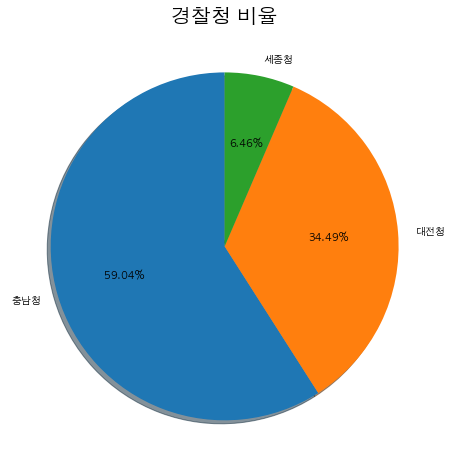

In [16]:
plt.subplots(figsize = (8,8))
plt.pie(kp2021['경찰청'].value_counts(), labels = kp2021['경찰청'].value_counts().index, 
        autopct="%.2f%%", shadow = True, startangle = 90)
plt.title('경찰청 비율', size=20)
plt.show()

In [17]:
# 경찰청에 따른 차이를 보기 위한 데이터 분류
kp2021_dj = kp2021[kp2021['경찰청']== '대전청']
kp2021_cn = kp2021[kp2021['경찰청']== '충남청']
kp2021_sj = kp2021[kp2021['경찰청']== '세종청']

In [18]:
# Categorical 그래프 함수 정의
def categorical_plot(column):

  f, ax = plt.subplots(1, 3, figsize=(16, 6))


  sns.countplot(x = column,
                data = kp2021_dj,
                ax = ax[0],
                order = kp2021_dj[column].value_counts().index)
  ax[0].tick_params(labelsize=12)
  ax[0].set_title('경찰청 = 대전청')
  ax[0].set_ylabel('count')
  ax[0].tick_params(rotation=50)


  sns.countplot(x = column,
                data = kp2021_cn,
                ax = ax[1],
                order = kp2021_cn[column].value_counts().index)
  ax[1].tick_params(labelsize=12)
  ax[1].set_title('경찰청 = 충남청')
  ax[1].set_ylabel('count')
  ax[1].tick_params(rotation=50)

  sns.countplot(x = column,
                data = kp2021_sj,
                ax = ax[2],
                order = kp2021_sj[column].value_counts().index)
  ax[2].tick_params(labelsize=12)
  ax[2].set_title('경찰청 = 세종청')
  ax[2].set_ylabel('count')
  ax[2].tick_params(rotation=50)
  plt.subplots_adjust(wspace=0.3, hspace=0.3)
  plt.show()

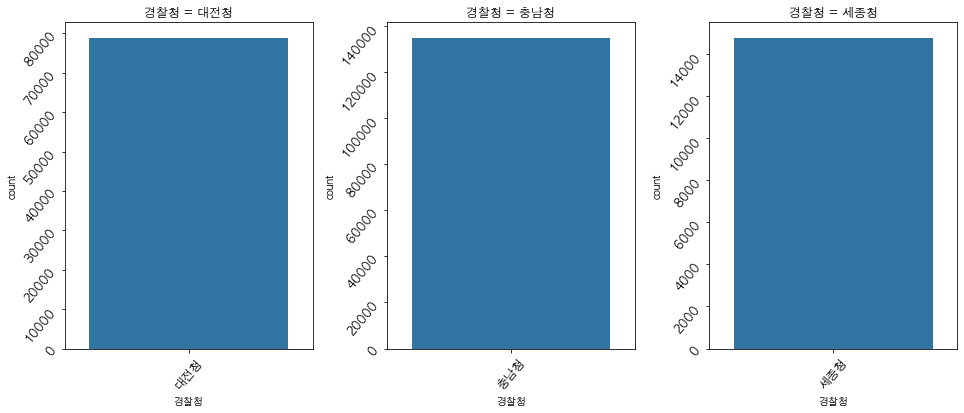

In [19]:
categorical_plot("경찰청")

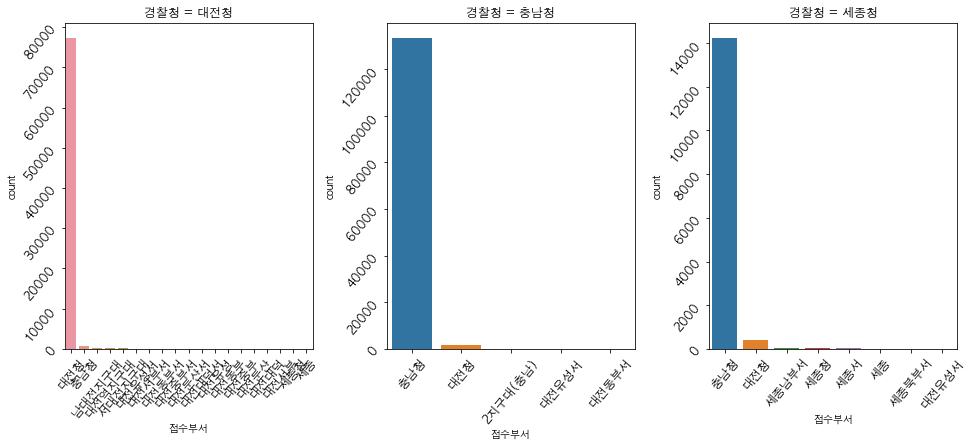

In [20]:
categorical_plot("접수부서")

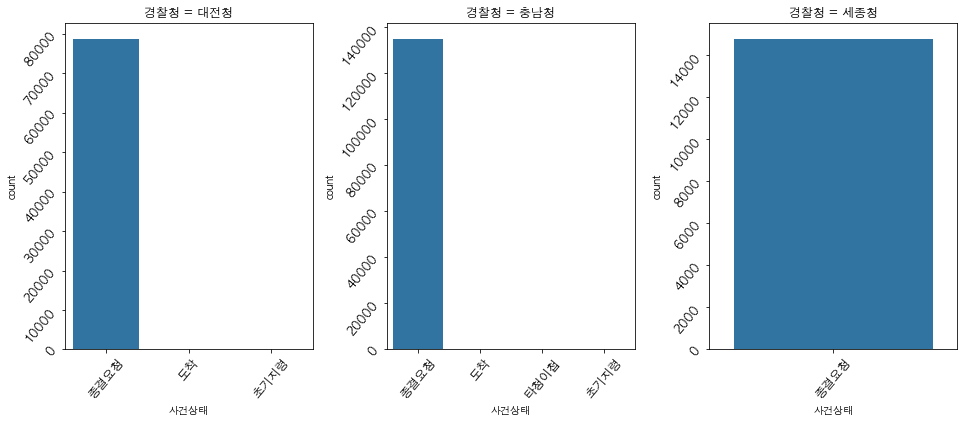

In [21]:
categorical_plot("사건상태")

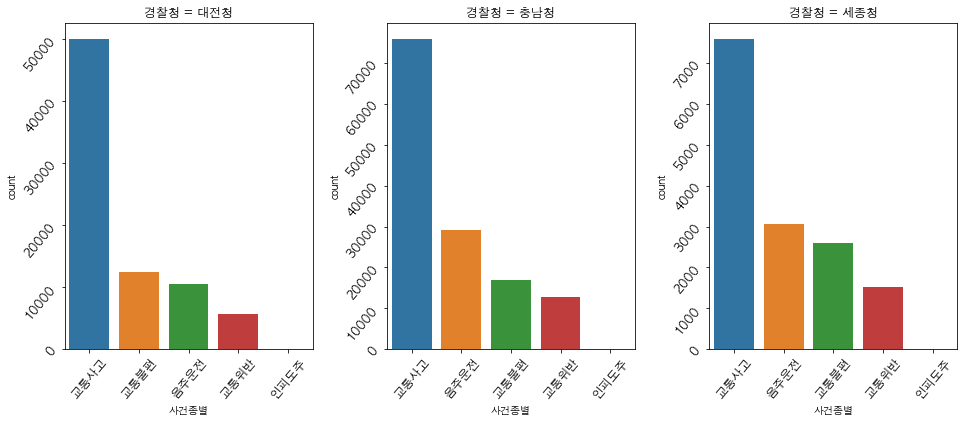

In [22]:
categorical_plot("사건종별")

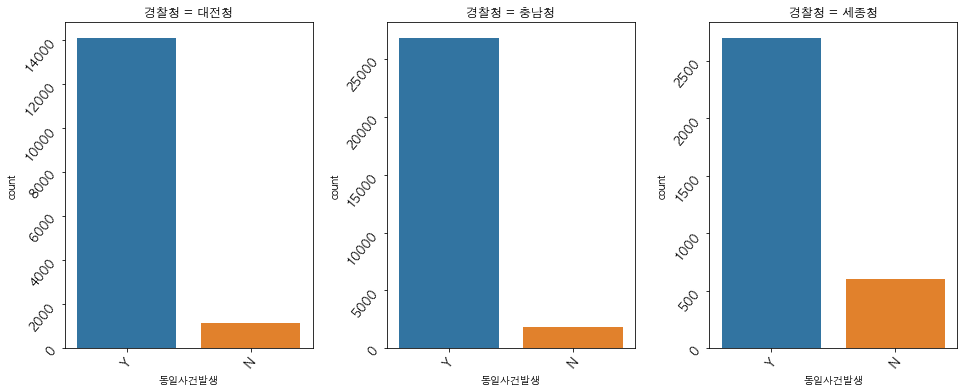

In [23]:
categorical_plot("동일사건발생")

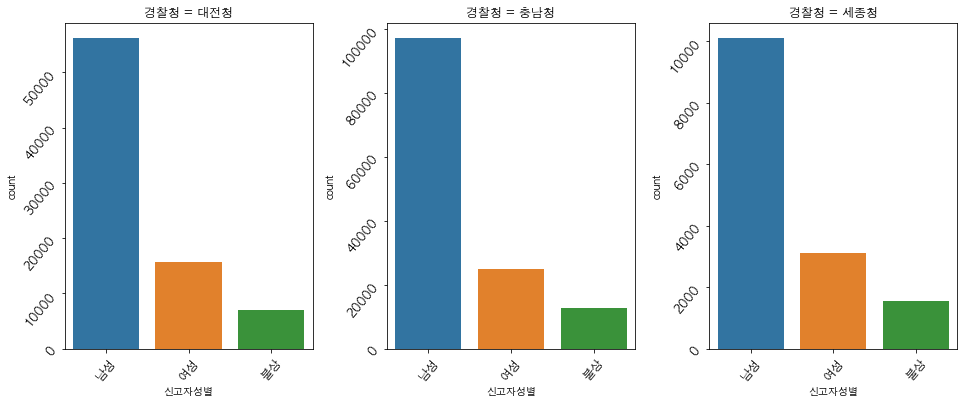

In [24]:
categorical_plot("신고자성별")

In [25]:
kp2021['접수완료일시'] = pd.to_datetime(kp2021['접수완료일시'], format='%y/%m/%d %H:%M:%S.000000000')

In [26]:
kp2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228570 entries, 0 to 228569
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   접수부서    228570 non-null  object        
 1   접수완료일시  228570 non-null  datetime64[ns]
 2   경찰청     228570 non-null  object        
 3   사건상태    228570 non-null  object        
 4   사건종별    228570 non-null  object        
 5   신고자성별   228570 non-null  object        
 6   발생지점    228523 non-null  object        
 7   경도      228558 non-null  float64       
 8   위도      228558 non-null  float64       
 9   동일사건발생  47246 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 17.4+ MB


<AxesSubplot:xlabel='접수완료일시', ylabel='count'>

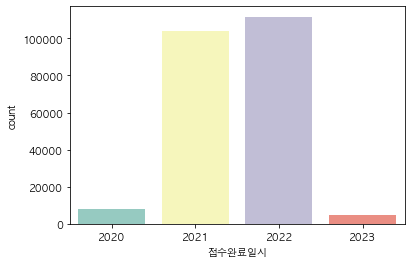

In [27]:
# 년별 count
sns.countplot(x=kp2021['접수완료일시'].dt.year, data=kp2021, palette='Set3')

<AxesSubplot:xlabel='접수완료일시', ylabel='count'>

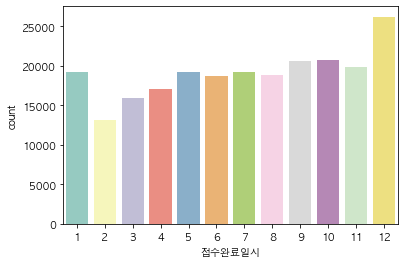

In [28]:
# 월별 count
sns.countplot(x=kp2021['접수완료일시'].dt.month, data=kp2021, palette='Set3')

<AxesSubplot:xlabel='접수완료일시', ylabel='count'>

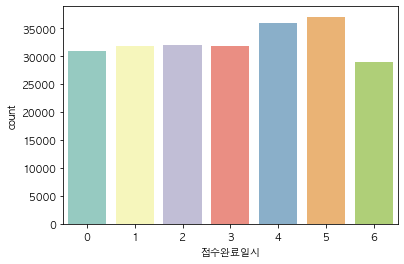

In [29]:
# 요일별 count
sns.countplot(x=kp2021['접수완료일시'].dt.weekday, data=kp2021, palette='Set3')

<AxesSubplot:xlabel='접수완료일시', ylabel='count'>

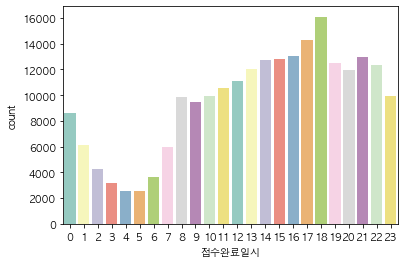

In [30]:
# 시간별 countd
sns.countplot(x=kp2021['접수완료일시'].dt.hour, data=kp2021, palette='Set3')

### 시간대 나누기

In [31]:
kp2021['시간대'] = np.where(kp2021['접수완료일시'].dt.hour >= 18, '저녁',
                np.where(kp2021['접수완료일시'].dt.hour >= 12, '오후',
                np.where(kp2021['접수완료일시'].dt.hour >= 6, '아침', '새벽')))

<AxesSubplot:xlabel='시간대', ylabel='count'>

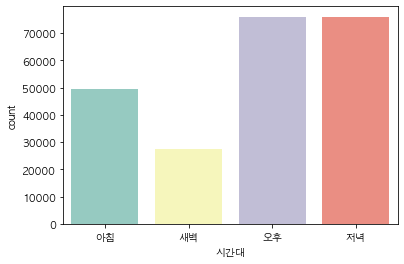

In [32]:
# 시간대별 count
sns.countplot(x='시간대', data=kp2021, palette='Set3')

### 지도 시각화

In [33]:
display(light_cn.head(2), camera_cn.head(2))

,번호,분전함,지번주소,위도,경도,데이터 기준일자
0,1,(미)동남D-62,충청남도 천안시 동남구 청당동 389-85,36.780809,127.145362,2022-07-05
1,2,(미)동남D-63,충청남도 천안시 동남구 청당동 299-11,36.779552,127.149370,2022-07-05


,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,...,설치장소,단속구분,제한속도,단속구간위치구분,과속단속구간길이,보호구역구분,설치연도,관리기관명,관리기관전화번호,데이터기준일자
0,천안서북-F0001,충청남도,천안시 서북구,시도,NaN,봉정로,3,충청남도 천안시 서북구 봉정로 89,충청남도 천안시 서북구 성정동 745-2,36.810381,...,서부역 삼거리,4,0,NaN,NaN,NaN,2013,충청남도 천안시 서북구청,041-521-6420,2022-07-01
1,천안서북-F0002,충청남도,천안시 서북구,시도,NaN,봉정로,3,충청남도 천안시 서북구 봉정로 130,충청남도 천안시 서북구 성정동 193-10,36.813499,...,성정사거리 부근,4,0,NaN,NaN,NaN,2015,충청남도 천안시 서북구청,041-521-6420,2022-07-01


### 발생지점 결측값 채우기

In [34]:
kp2021['발생지점'].isnull().sum()

47

In [35]:
kp2021['발생지점'] = kp2021['발생지점'].fillna('missing')

### 0. 천안시 두정동 위주로 시각화
파랑색

In [36]:
cn_filter = kp2021['발생지점'].str.contains('충청남도 천안시 서북구 두정동')
kp = kp2021[cn_filter]
kp

,접수부서,접수완료일시,경찰청,사건상태,사건종별,신고자성별,발생지점,경도,위도,동일사건발생,시간대
21,충남청,2020-12-01 01:06:14,충남청,종결요청,교통사고,남성,충청남도 천안시 서북구 두정동(행정:부성2동) 886,127.135456,36.832394,NaN,새벽
31,충남청,2020-12-01 00:57:22,충남청,종결요청,음주운전,남성,충청남도 천안시 서북구 두정동(행정:부성2동),127.132976,36.826522,NaN,새벽
40,충남청,2020-12-01 03:44:07,충남청,종결요청,교통위반,남성,충청남도 천안시 서북구 두정동(행정:부성2동) 886,127.135476,36.832410,NaN,새벽
52,충남청,2020-12-01 13:15:50,충남청,종결요청,교통사고,불상,충청남도 천안시 서북구 두정동 526-1 극동늘푸른 113동 앞,127.132350,36.829100,N,오후
314,충남청,2020-12-03 22:19:01,충남청,종결요청,음주운전,여성,충청남도 천안시 서북구 두정동(부성1동) 1388,127.140556,36.830000,NaN,저녁
...,...,...,...,...,...,...,...,...,...,...,...
228314,충남청,2023-01-14 22:36:20,충남청,종결요청,교통위반,남성,충청남도 천안시 서북구 두정동 (행정:부성2동 ) 868-2,127.135721,36.832107,Y,저녁
228344,충남청,2023-01-13 22:07:38,충남청,종결요청,교통불편,남성,충청남도 천안시 서북구 두정동 (부성2동 ) 886,127.135634,36.832523,NaN,저녁
228399,충남청,2023-01-17 18:38:59,충남청,종결요청,교통사고,남성,충청남도 천안시 서북구 두정동 (부성1동 ) 2037,127.151599,36.833349,NaN,저녁
228412,충남청,2023-01-12 19:47:51,충남청,종결요청,교통사고,불상,충청남도 천안시 서북구 두정동 162-4 두정역 앞 스타벅스,127.146330,36.833120,Y,저녁


In [37]:
kp = kp[['접수완료일시', '사건종별', '위도', '경도', '발생지점', '시간대']]
kp

,접수완료일시,사건종별,위도,경도,발생지점,시간대
21,2020-12-01 01:06:14,교통사고,36.832394,127.135456,충청남도 천안시 서북구 두정동(행정:부성2동) 886,새벽
31,2020-12-01 00:57:22,음주운전,36.826522,127.132976,충청남도 천안시 서북구 두정동(행정:부성2동),새벽
40,2020-12-01 03:44:07,교통위반,36.832410,127.135476,충청남도 천안시 서북구 두정동(행정:부성2동) 886,새벽
52,2020-12-01 13:15:50,교통사고,36.829100,127.132350,충청남도 천안시 서북구 두정동 526-1 극동늘푸른 113동 앞,오후
314,2020-12-03 22:19:01,음주운전,36.830000,127.140556,충청남도 천안시 서북구 두정동(부성1동) 1388,저녁
...,...,...,...,...,...,...
228314,2023-01-14 22:36:20,교통위반,36.832107,127.135721,충청남도 천안시 서북구 두정동 (행정:부성2동 ) 868-2,저녁
228344,2023-01-13 22:07:38,교통불편,36.832523,127.135634,충청남도 천안시 서북구 두정동 (부성2동 ) 886,저녁
228399,2023-01-17 18:38:59,교통사고,36.833349,127.151599,충청남도 천안시 서북구 두정동 (부성1동 ) 2037,저녁
228412,2023-01-12 19:47:51,교통사고,36.833120,127.146330,충청남도 천안시 서북구 두정동 162-4 두정역 앞 스타벅스,저녁


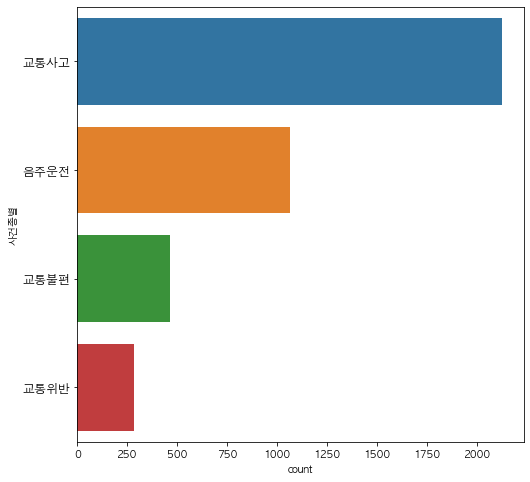

In [38]:
plt.figure(figsize = (8, 8))
sns.countplot(y=kp['사건종별'], order=kp['사건종별'].value_counts().index)
plt.yticks(fontsize=12)
plt.show()

In [39]:
# 충청남도 천안시 서북구 두정동(인비에스 인근)

# 위도
latitude = 36.833297

# 경도
longitude = 127.135729

In [40]:
# 충청남도 천안시 서북구 두정동(인비에스 인근)

# 위도
latitude_1 = 36.833297

# 경도
longitude_1 = 127.135729

In [41]:
# 충청남도 천안시 서북구 두정동(커피농 인근)

# 위도
latitude_2 = 36.832507

# 경도
longitude_2 = 127.135651

In [42]:
# 충청남도 천안시 서북구 두정동(셜록홈즈천안두정점 인근)

# 위도
latitude_3 = 36.832541

# 경도
longitude_3 = 127.13402

In [43]:
# 충청남도 천안시 서북구 두정동(주네모건축 인근)

# 위도
latitude_4 = 36.825042

# 경도
longitude_4 = 127.138027

In [44]:
# 충청남도 천안시 서북구 두정동(원두정2길원두정8길 인근)

# 위도
latitude_5 = 36.832507

# 경도
longitude_5 = 127.135651

### 1. 충청남도 천안시_가로등 현황

In [ ]:
light_cn.head(2)

In [ ]:
cn_filter_2 = light_cn['지번주소'].str.contains('충청남도 천안시 서북구 두정동')
kp_2 = light_cn[cn_filter_2]
kp_2.shape

### 2. 충청남도_천안시_무인교통단속카메라

In [ ]:
camera_cn.head(2)

In [ ]:
cn_filter_3 = camera_cn['소재지지번주소'].str.contains('충청남도 천안시 서북구 두정동')
kp_3 = camera_cn[cn_filter_3]
kp_3.shape

### 3. 충청남도_천안시_신호등

In [ ]:
traf_cn.head(2)

In [ ]:
cn_filter_4 = traf_cn['소재지지번주소'].str.contains('충청남도 천안시 서북구 두정동')
kp_4 = traf_cn[cn_filter_4]
kp_4.shape

### 4. 충청남도_천안시_주차장

In [ ]:
parking_cn

### folium Map 시각화  -> 두정동
4가지

In [ ]:
from folium.plugins import MarkerCluster


m = folium.Map(
    location=[latitude, longitude],
    zoom_start=18
)

coords = kp[['위도', '경도']]


marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], popup='사고지역', icon=folium.Icon(
        icon='exclamation-sign', color='red')).add_to(marker_cluster)


coords = kp_2[['위도', '경도']]


for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], popup='가로등', icon = folium.Icon(icon='star', color='orange')).add_to(marker_cluster)
    
coords = kp_3[['위도', '경도']]



for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], popup='단속카메라', icon = folium.Icon(icon='facetime-video', color='blue')).add_to(marker_cluster)
    
coords = kp_4[['위도', '경도']]



for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], popup='신호등', icon = folium.Icon(icon='ice-lolly', color='green')).add_to(marker_cluster)


    
    
folium.CircleMarker([latitude_1, longitude_1],
              color="black",
              radius = 30,
              tooltip="인비에스 인근").add_to(m)

folium.CircleMarker([latitude_2, longitude_2],
              color="black",
              radius = 50,
              tooltip="커피농 인근").add_to(m)

folium.CircleMarker([latitude_3, longitude_3],
              color="black",
              radius = 30,
              tooltip="셜록홈즈천안두정점 인근").add_to(m)

folium.CircleMarker([latitude_4, longitude_4],
              color="black",
              radius = 30,
              tooltip="주네모건축 인근").add_to(m)

folium.CircleMarker([latitude_5, longitude_5],
              color="black",
              radius = 30,
              tooltip="원두정2길원두정8길 인근").add_to(m)
    
m

In [ ]:
import webbrowser
m.save('충청남도 천안시.html')
webbrowser.open_new("충청남도 천안시.html")

### 충남 데이터 전체 지도 시각화

In [45]:
kp2021 = kp2021[kp2021['경찰청'] == '충남청']

In [46]:
kp2021.dropna(subset=['위도', '경도'], inplace=True)

In [47]:
from folium.plugins import MarkerCluster

m2 = folium.Map(
    location=[latitude, longitude],
    zoom_start=18
)

coords = kp2021[['위도', '경도']]

marker_cluster = MarkerCluster().add_to(m2)

for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], popup='사고지역', icon=folium.Icon(
        icon='exclamation-sign', color='red')).add_to(marker_cluster)

coords = camera_cn[['위도', '경도']]

for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], popup='단속카메라', icon = folium.Icon(icon='facetime-video', color='blue')).add_to(m2)
    

coords = light_cn[['위도', '경도']]

for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], popup='가로등', icon = folium.Icon(icon='star', color='orange')).add_to(marker_cluster)
    
coords = traf_cn[['위도', '경도']]

for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], popup='신호등', icon = folium.Icon(icon='ice-lolly', color='green')).add_to(m2)

coords = parking_cn[['위도', '경도']]

for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], popup='주차장', icon = folium.Icon(icon='inbox', color='purple')).add_to(m2)
    
    
folium.CircleMarker([latitude_1, longitude_1],
              color="black",
              radius = 20,
              tooltip="인비에스 인근").add_to(m2)

folium.CircleMarker([latitude_2, longitude_2],
              color="black",
              radius = 20,
              tooltip="커피농 인근").add_to(m2)

folium.CircleMarker([latitude_3, longitude_3],
              color="black",
              radius = 20,
              tooltip="셜록홈즈천안두정점 인근").add_to(m2)

folium.CircleMarker([latitude_4, longitude_4],
              color="black",
              radius = 20,
              tooltip="주네모건축 인근").add_to(m2)

folium.CircleMarker([latitude_5, longitude_5],
              color="black",
              radius = 20,
              tooltip="원두정2길원두정8길 인근").add_to(m2)
    


In [ ]:
import webbrowser
m2.save('충청남도 천안시_전체.html')
webbrowser.open_new("충청남도 천안시_전체.html")

### cds_c 충청남도 천안 2019년 ~ 2021년 데이터

In [48]:
cds_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9262 entries, 0 to 9261
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        9262 non-null   int64 
 1   사고일시        9262 non-null   object
 2   요일          9262 non-null   object
 3   시군구         9262 non-null   object
 4   사고내용        9262 non-null   object
 5   사망자수        9262 non-null   int64 
 6   중상자수        9262 non-null   int64 
 7   경상자수        9262 non-null   int64 
 8   부상신고자수      9262 non-null   int64 
 9   사고유형        9262 non-null   object
 10  법규위반        9262 non-null   object
 11  노면상태        9262 non-null   object
 12  기상상태        9262 non-null   object
 13  도로형태        9262 non-null   object
 14  가해운전자 차종    9262 non-null   object
 15  가해운전자 성별    9262 non-null   object
 16  가해운전자 연령    9262 non-null   object
 17  가해운전자 상해정도  9262 non-null   object
 18  피해운전자 차종    9020 non-null   object
 19  피해운전자 성별    9020 non-null   object
 20  피해운전자 연령

In [49]:
cds_c.head(2)

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2019010100100009,2019년 1월 1일 00시,화요일,충청남도 천안시 동남구 목천읍,경상사고,0,0,2,0,차대차 - 기타,...,맑음,교차로 - 교차로부근,승용,남,47세,상해없음,승용,남,30세,경상
1,2019010100100056,2019년 1월 1일 03시,화요일,충청남도 천안시 서북구 와촌동,중상사고,0,1,0,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,승용,남,43세,상해없음,승용,남,29세,중상


In [50]:
cds_c['사고일시'] = pd.to_datetime(cds_c['사고일시'], format='%Y년 %m월 %d일 %H시')

<AxesSubplot:xlabel='사고일시', ylabel='count'>

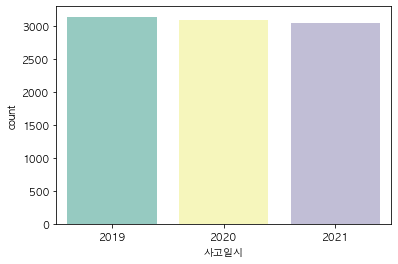

In [53]:
# 년별 count

sns.countplot(x=cds_c['사고일시'].dt.year, data=cds_c, palette='Set3')

<AxesSubplot:xlabel='사고일시', ylabel='count'>

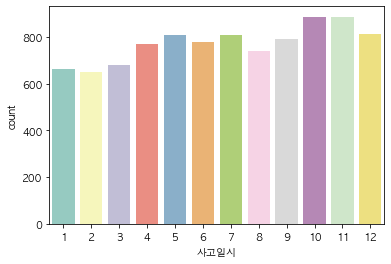

In [54]:
# 월별 count

sns.countplot(x=cds_c['사고일시'].dt.month, data=cds_c, palette='Set3')

<AxesSubplot:xlabel='사고일시', ylabel='count'>

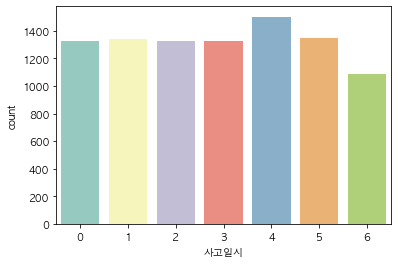

In [55]:
# 요일별 count

sns.countplot(x=cds_c['사고일시'].dt.weekday, data=cds_c, palette='Set3')

Text(0.5, 0, '사고시간')

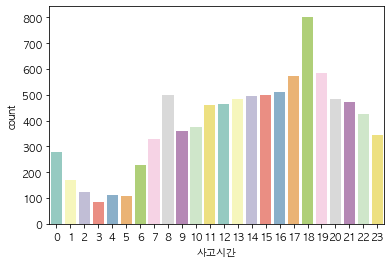

In [56]:
# 시간별 count

sns.countplot(x=cds_c['사고일시'].dt.hour, data=cds_c, palette='Set3')
plt.xlabel('사고시간')

In [57]:
cds_c['시간대'] = np.where(cds_c['사고일시'].dt.hour >= 18, '저녁',
                np.where(cds_c['사고일시'].dt.hour >= 12, '오후',
                np.where(cds_c['사고일시'].dt.hour >=6, '아침', '새벽')))

<AxesSubplot:xlabel='시간대', ylabel='count'>

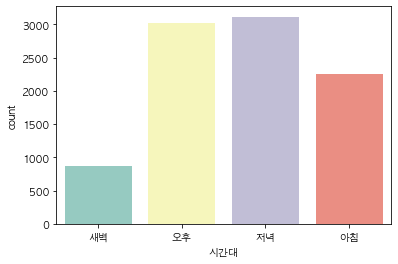

In [58]:
# 시간대별 count

sns.countplot(x='시간대', data=cds_c, palette='Set3')

<AxesSubplot:xlabel='사고내용', ylabel='count'>

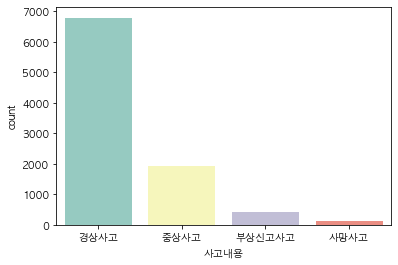

In [59]:
# 사고내용 count

sns.countplot(x='사고내용', data=cds_c, palette='Set3')

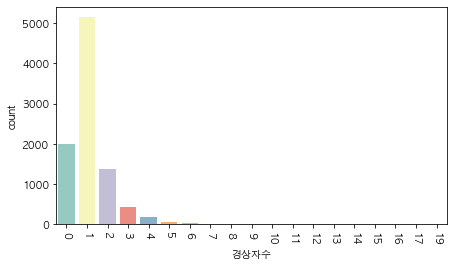

In [60]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=-90)
sns.countplot(x='경상자수', data=cds_c, palette='Set3');

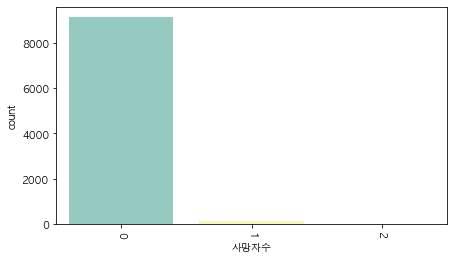

In [61]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=-90)
sns.countplot(x='사망자수', data=cds_c, palette='Set3');

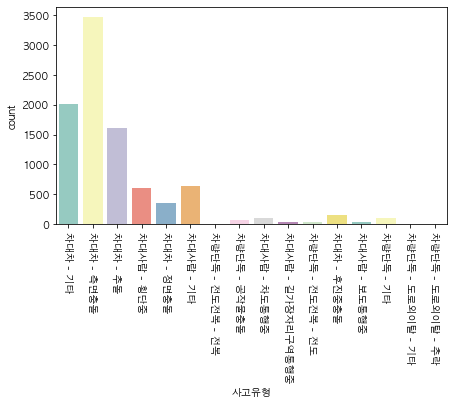

In [62]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=-90)
sns.countplot(x='사고유형', data=cds_c, palette='Set3');

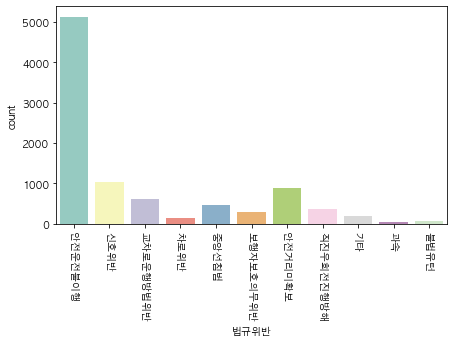

In [63]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=-90)
sns.countplot(x='법규위반', data=cds_c,palette='Set3');

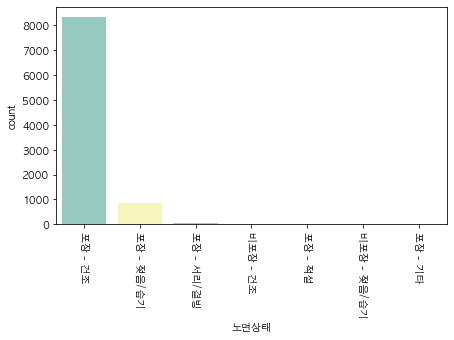

In [64]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=-90)
sns.countplot(x='노면상태', data=cds_c, palette='Set3');

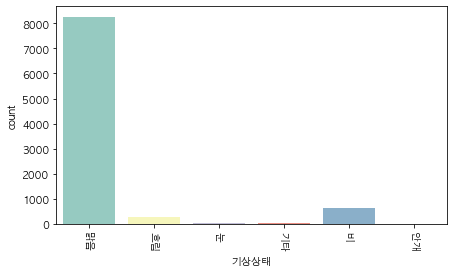

In [65]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=-90)
sns.countplot(x='기상상태', data=cds_c, palette='Set3');

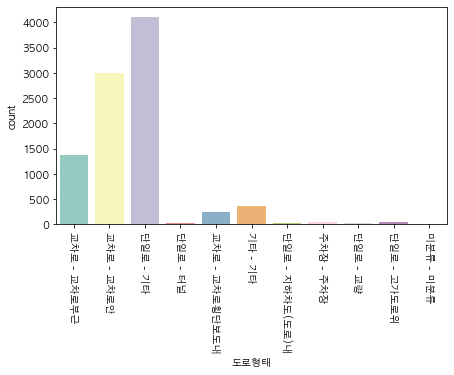

In [66]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=-90)
sns.countplot(x='도로형태', data=cds_c, palette='Set3');

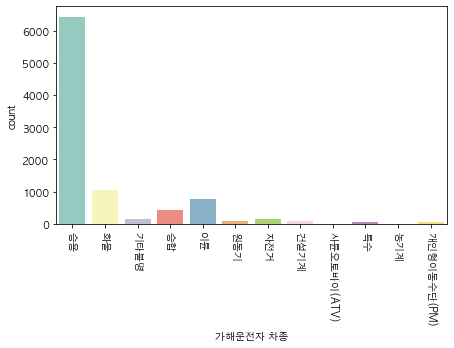

In [67]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=-90)
sns.countplot(x='가해운전자 차종', data=cds_c, palette='Set3');

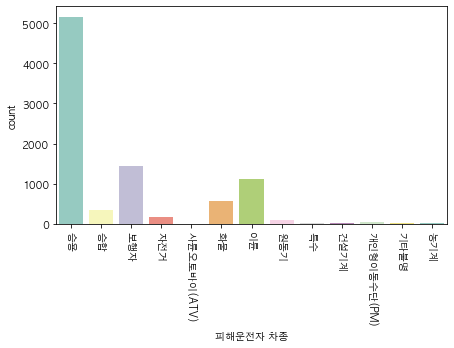

In [68]:
plt.figure(figsize=(7,4))
plt.xticks(rotation= -90)
sns.countplot(x='피해운전자 차종', data=cds_c, palette='Set3');

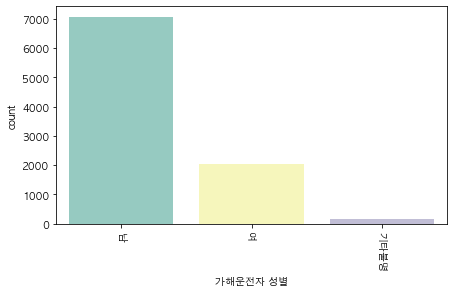

In [69]:
plt.figure(figsize=(7,4))
plt.xticks(rotation= -90)
sns.countplot(x='가해운전자 성별', data=cds_c, palette='Set3');

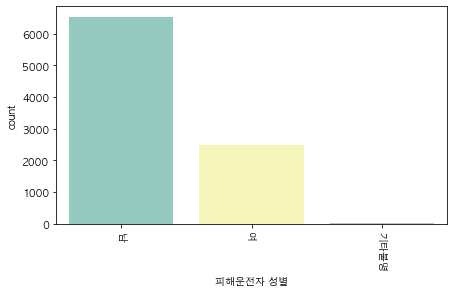

In [70]:
plt.figure(figsize=(7,4))
plt.xticks(rotation= -90)
sns.countplot(x='피해운전자 성별', data=cds_c, palette='Set3');

In [71]:
cds_c.select_dtypes(['object']).describe().T

,count,unique,top,freq
요일,9262,7,금요일,1503
시군구,9262,43,충청남도 천안시 서북구 성정동,1170
사고내용,9262,4,경상사고,6789
사고유형,9262,16,차대차 - 측면충돌,3461
법규위반,9262,11,안전운전불이행,5133
노면상태,9262,7,포장 - 건조,8327
기상상태,9262,6,맑음,8266
도로형태,9262,11,단일로 - 기타,4101
가해운전자 차종,9262,12,승용,6437
가해운전자 성별,9262,3,남,7062


In [72]:
cds_c['가해운전자 연령'].unique()

array(['47세', '43세', '36세', '30세', '50세', '51세', '49세', '20세', '32세',
       '55세', '31세', '53세', '미분류', '65세', '48세', '68세', '24세', '23세',
       '29세', '46세', '45세', '41세', '57세', '44세', '14세', '64세', '26세',
       '22세', '60세', '66세', '40세', '16세', '38세', '28세', '59세', '37세',
       '58세', '54세', '42세', '34세', '39세', '25세', '27세', '63세', '52세',
       '33세', '35세', '67세', '19세', '84세', '21세', '72세', '69세', '62세',
       '77세', '56세', '61세', '18세', '78세', '75세', '80세', '74세', '15세',
       '87세', '71세', '76세', '79세', '73세', '70세', '17세', '81세', '13세',
       '82세', '86세', '10세', '83세', '12세', '85세', '11세', '7세', '91세', '9세',
       '8세', '5세'], dtype=object)

In [73]:
cds_c['가해운전자 연령'] = cds_c['가해운전자 연령'].str.replace('세','')
cds_c[cds_c['가해운전자 연령'] == '미분류'] = np.nan
cds_c['가해운전자 연령'] = cds_c['가해운전자 연령'].astype('float')

In [74]:
cds_c['피해운전자 연령'].unique()

array(['30세', '29세', '57세', '55세', '38세', '63세', '35세', '50세', '59세',
       '60세', '62세', '25세', '52세', '17세', '71세', nan, '31세', '49세', '28세',
       '46세', '61세', '68세', '42세', '84세', '37세', '47세', '51세', '48세',
       '73세', '23세', '43세', '34세', '45세', '33세', '32세', '36세', '58세',
       '64세', '19세', '72세', '65세', '22세', '18세', '24세', '40세', '53세',
       '41세', '27세', '21세', '70세', '26세', '44세', '75세', '15세', '39세',
       '54세', '66세', '56세', '80세', '67세', '69세', '74세', '76세', '20세',
       '12세', '미분류', '2세', '77세', '85세', '87세', '79세', '9세', '83세', '7세',
       '6세', '82세', '16세', '8세', '78세', '4세', '14세', '13세', '10세', '88세',
       '89세', '86세', '11세', '90세 이상', '81세', '5세', '93세'], dtype=object)

In [75]:
cds_c['피해운전자 연령'] = cds_c['피해운전자 연령'].str.replace('세 이상', '')
cds_c['피해운전자 연령'] = cds_c['피해운전자 연령'].str.replace('세','')
cds_c[cds_c['피해운전자 연령'] == '미분류'] = np.nan
cds_c['피해운전자 연령'] = cds_c['피해운전자 연령'].astype('float')

In [76]:
cds_c['가해운전자 연령'] = cds_c['가해운전자 연령'].clip(lower=20)
cds_c['피해운전자 연령'] = cds_c['피해운전자 연령'].clip(lower=20)

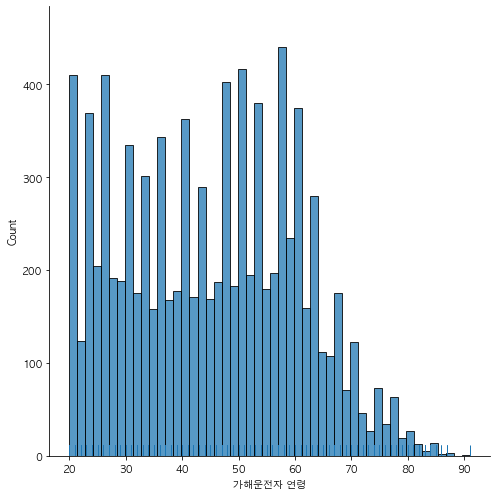

In [77]:
sns.displot(x='가해운전자 연령', kind='hist', rug=True, bins=50, height=7, data=cds_c, palette='Set3');


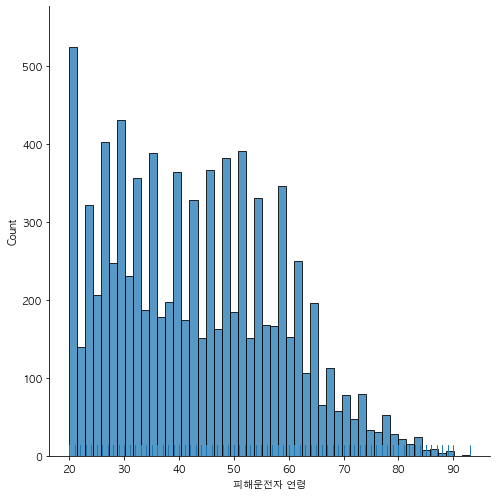

In [78]:
sns.displot(x='피해운전자 연령', kind='hist', rug=True, bins=50, height=7, data=cds_c)

In [79]:
cds_c_top10 = cds_c.sort_values(by='사고유형', ascending=False).groupby('시군구').head(10)

In [80]:
cds_c_top10[:10]['시군구'].to_list()

['충청남도 천안시 서북구 직산읍',
 '충청남도 천안시 동남구 문화동',
 '충청남도 천안시 동남구 신방동',
 '충청남도 천안시 동남구 병천면',
 '충청남도 천안시 서북구 성거읍',
 '충청남도 천안시 서북구 불당동',
 '충청남도 천안시 동남구 구성동',
 '충청남도 천안시 서북구 성환읍',
 '충청남도 천안시 서북구 백석동',
 '충청남도 천안시 서북구 성거읍']

In [81]:
cds_c['시군구'].fillna('미분류', inplace=True)

In [82]:
cds_c[cds_c['시군구'].str.contains('두정동')].shape

(1037, 23)

In [83]:
cds_d = cds_c.loc[cds_c['시군구'].str.contains('두정동')]
cds_d

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,시간대
6,2.019010e+15,2019-01-01 23:00:00,화요일,충청남도 천안시 서북구 두정동,경상사고,0.0,0.0,1.0,0.0,차대사람 - 횡단중,...,단일로 - 기타,승용,남,30.0,상해없음,보행자,남,29.0,경상,저녁
8,2.019010e+15,2019-01-02 00:00:00,수요일,충청남도 천안시 서북구 두정동,경상사고,0.0,0.0,2.0,0.0,차대차 - 정면충돌,...,교차로 - 교차로안,승용,여,20.0,상해없음,승용,남,50.0,경상,새벽
10,2.019010e+15,2019-01-02 12:00:00,수요일,충청남도 천안시 서북구 두정동,경상사고,0.0,0.0,1.0,0.0,차대차 - 정면충돌,...,교차로 - 교차로안,승용,여,32.0,상해없음,승합,남,60.0,경상,오후
11,2.019010e+15,2019-01-02 15:00:00,수요일,충청남도 천안시 서북구 두정동,경상사고,0.0,0.0,1.0,0.0,차대차 - 측면충돌,...,교차로 - 교차로부근,승용,남,49.0,상해없음,자전거,남,62.0,경상,오후
35,2.019011e+15,2019-01-05 06:00:00,토요일,충청남도 천안시 서북구 두정동,중상사고,0.0,1.0,0.0,0.0,차대차 - 측면충돌,...,교차로 - 교차로안,원동기,남,20.0,중상,승용,남,68.0,상해없음,아침
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9215,2.021123e+15,2021-12-26 01:00:00,일요일,충청남도 천안시 서북구 두정동,경상사고,0.0,0.0,3.0,0.0,차대차 - 추돌,...,단일로 - 기타,승용,남,31.0,기타불명,승용,남,68.0,경상,새벽
9218,2.021123e+15,2021-12-26 14:00:00,일요일,충청남도 천안시 서북구 두정동,경상사고,0.0,0.0,1.0,0.0,차대차 - 측면충돌,...,교차로 - 교차로안,이륜,남,39.0,상해없음,승용,남,57.0,경상,오후
9249,2.021123e+15,2021-12-29 22:00:00,수요일,충청남도 천안시 서북구 두정동,부상신고사고,0.0,0.0,0.0,1.0,차대차 - 측면충돌,...,교차로 - 교차로안,이륜,남,44.0,부상신고,승합,남,44.0,상해없음,저녁
9256,2.021123e+15,2021-12-30 19:00:00,목요일,충청남도 천안시 서북구 두정동,경상사고,0.0,0.0,1.0,0.0,차대차 - 기타,...,단일로 - 기타,이륜,남,34.0,경상,승용,여,57.0,상해없음,저녁


In [84]:
cds_d.columns

Index(['사고번호', '사고일시', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
       '피해운전자 상해정도', '시간대'],
      dtype='object')

In [85]:
cds_d['사고일시'] = pd.to_datetime(cds_d['사고일시'], format='%Y년 %m월 %d일 %H시')

<AxesSubplot:xlabel='사고일시', ylabel='count'>

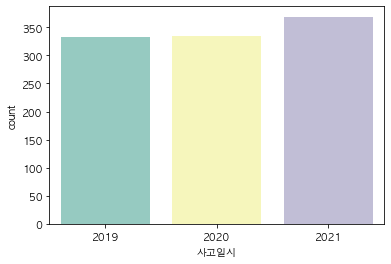

In [86]:
# 년별 count

sns.countplot(x=cds_d['사고일시'].dt.year, data=cds_d, palette='Set3')

<AxesSubplot:xlabel='사고일시', ylabel='count'>

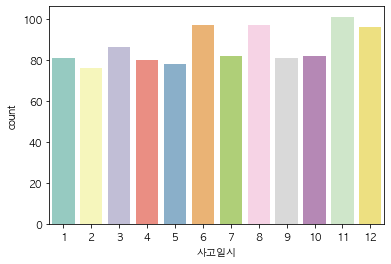

In [87]:
# 월별 count

sns.countplot(x=cds_d['사고일시'].dt.month, data=cds_d, palette='Set3')

<AxesSubplot:xlabel='사고일시', ylabel='count'>

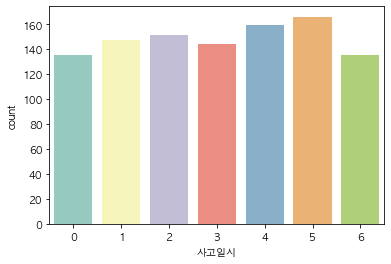

In [88]:
# 요일별 count

sns.countplot(x=cds_d['사고일시'].dt.weekday, data=cds_d, palette='Set3')

<AxesSubplot:xlabel='사고일시', ylabel='count'>

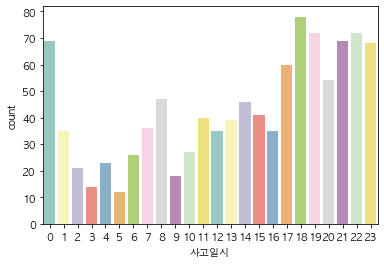

In [89]:
# 시간별 count

sns.countplot(x=cds_d['사고일시'].dt.hour, data=cds_d, palette='Set3')

In [90]:
cds_d['시간대'] = np.where(cds_d['사고일시'].dt.hour >= 18, '저녁',
                np.where(cds_d['사고일시'].dt.hour >= 12, '오후',
                np.where(cds_d['사고일시'].dt.hour >=6, '아침', '새벽')))

<AxesSubplot:xlabel='시간대', ylabel='count'>

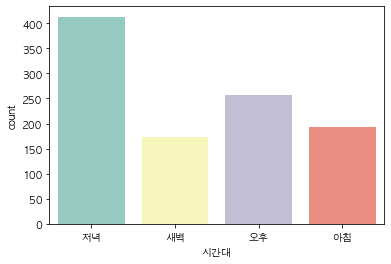

In [91]:
# 시간대별 count

sns.countplot(x='시간대', data=cds_d, palette='Set3')

<AxesSubplot:xlabel='사고내용', ylabel='count'>

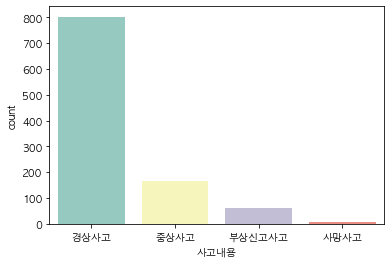

In [92]:
# 사고내용 count

sns.countplot(x='사고내용', data=cds_d, palette='Set3')

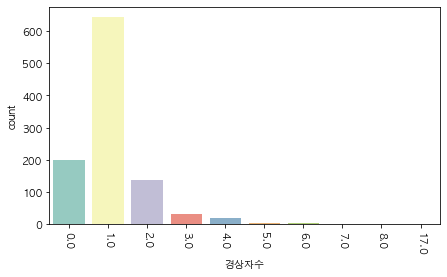

In [93]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=-90)
sns.countplot(x='경상자수', data=cds_d, palette='Set3');

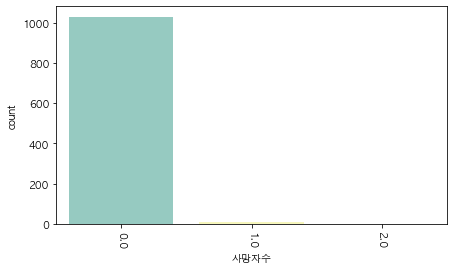

In [94]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=-90)
sns.countplot(x='사망자수', data=cds_d, palette='Set3');

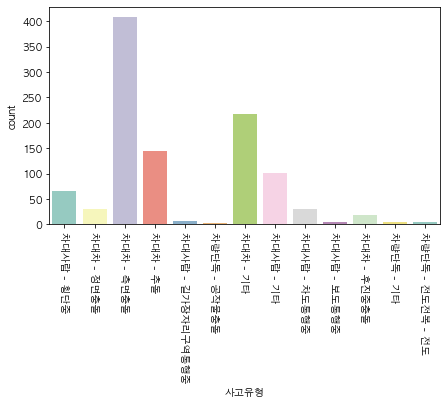

In [95]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=-90)
sns.countplot(x='사고유형', data=cds_d, palette='Set3');

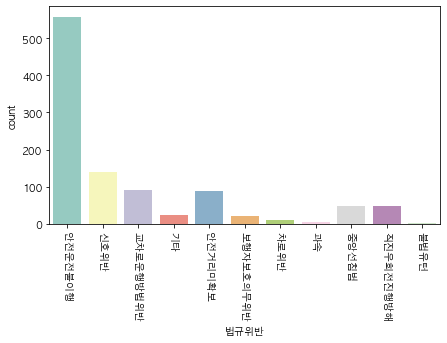

In [96]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=-90)
sns.countplot(x='법규위반', data=cds_d,palette='Set3');

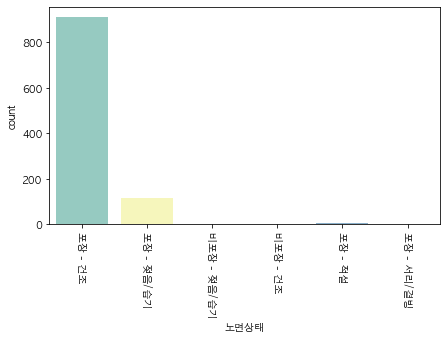

In [97]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=-90)
sns.countplot(x='노면상태', data=cds_d, palette='Set3');

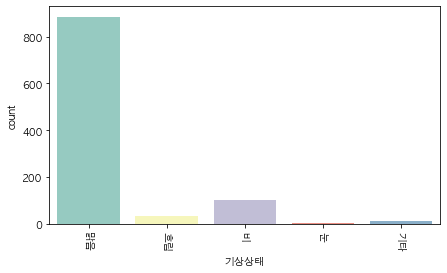

In [98]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=-90)
sns.countplot(x='기상상태', data=cds_d, palette='Set3');

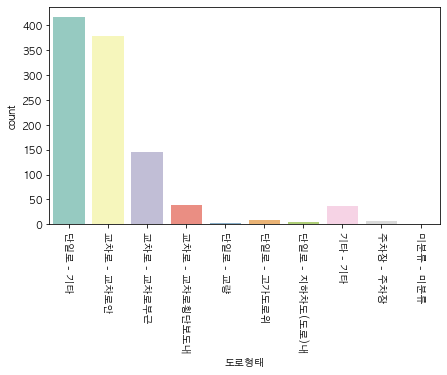

In [99]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=-90)
sns.countplot(x='도로형태', data=cds_d, palette='Set3');

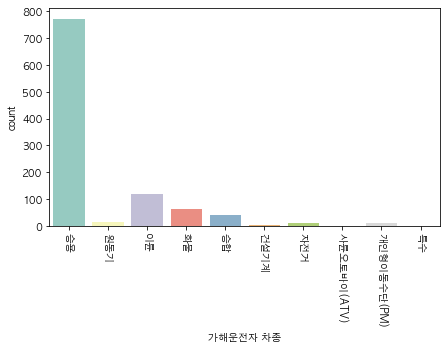

In [100]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=-90)
sns.countplot(x='가해운전자 차종', data=cds_d, palette='Set3');

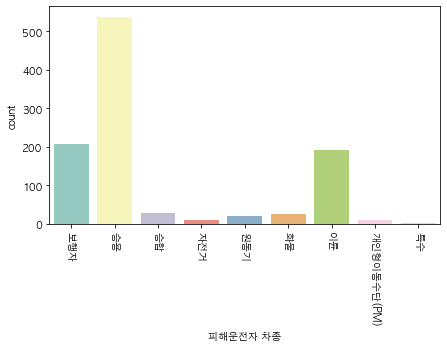

In [101]:
plt.figure(figsize=(7,4))
plt.xticks(rotation= -90)
sns.countplot(x='피해운전자 차종', data=cds_d, palette='Set3');

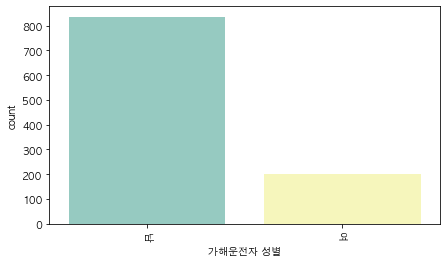

In [102]:
plt.figure(figsize=(7,4))
plt.xticks(rotation= -90)
sns.countplot(x='가해운전자 성별', data=cds_d, palette='Set3');

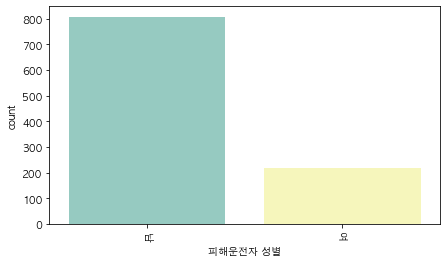

In [103]:
plt.figure(figsize=(7,4))
plt.xticks(rotation= -90)
sns.countplot(x='피해운전자 성별', data=cds_d, palette='Set3');

In [104]:
cds_d.select_dtypes(['object']).describe().T

,count,unique,top,freq
요일,1037,7,토요일,166
시군구,1037,1,충청남도 천안시 서북구 두정동,1037
사고내용,1037,4,경상사고,802
사고유형,1037,13,차대차 - 측면충돌,408
법규위반,1037,11,안전운전불이행,558
노면상태,1037,6,포장 - 건조,911
기상상태,1037,5,맑음,885
도로형태,1037,10,단일로 - 기타,416
가해운전자 차종,1037,10,승용,773
가해운전자 성별,1037,2,남,836


In [105]:
cds_d['가해운전자 연령'].unique()

array([30., 20., 32., 49., 22., 37., 54., 36., 35., 21., 26., 45., 38.,
       34., 47., 24., 25., 29., 53., 33., 60., 40., 44., 48., 27., 56.,
       57., 46., 61., 23., 43., 42., 39., 78., 28., 51., 55., 70., 87.,
       58., 72., 52., 50., 59., 41., 31., 67., 64., 69., 63., 76., 77.,
       65., 68., 62., 75., 74., 66., 71., 80.])

In [106]:
cds_d['피해운전자 연령'].unique()

array([29., 50., 60., 62., 68., 38., 45., 23., 20., 25., 48., 53., nan,
       64., 22., 80., 67., 24., 58., 28., 51., 41., 31., 33., 46., 55.,
       37., 44., 56., 39., 47., 49., 61., 69., 40., 27., 43., 79., 54.,
       26., 63., 32., 35., 52., 78., 34., 59., 72., 57., 36., 30., 21.,
       42., 90., 77., 66., 65., 70., 73., 71., 84.])

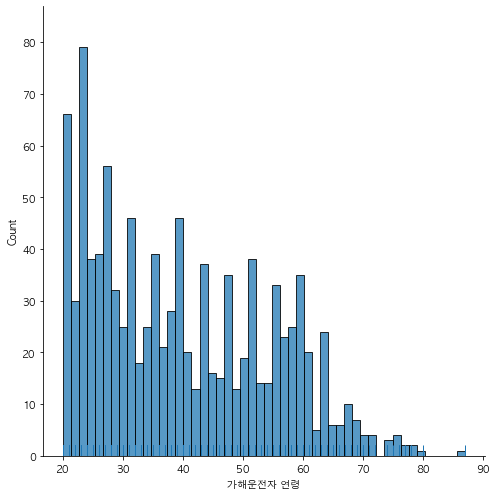

In [107]:
sns.displot(x='가해운전자 연령', kind='hist', rug=True, bins=50, height=7, data=cds_d, palette='Set3');


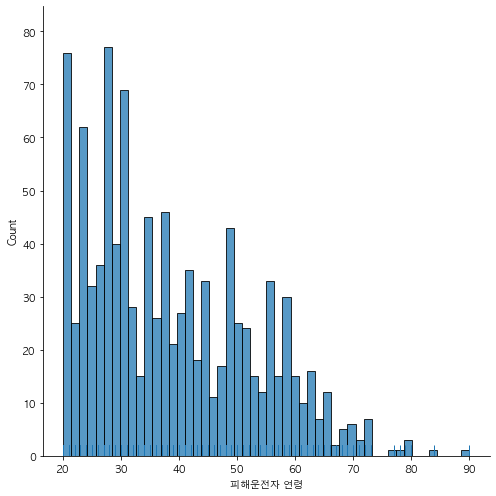

In [108]:
sns.displot(x='피해운전자 연령', kind='hist', rug=True, bins=50, height=7, data=cds_d)


### 천안시 전체 데이터와  천안시 두정동 데이터시각화

In [109]:
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='AppleGothic')

Text(0.5, 0, '사고요일')

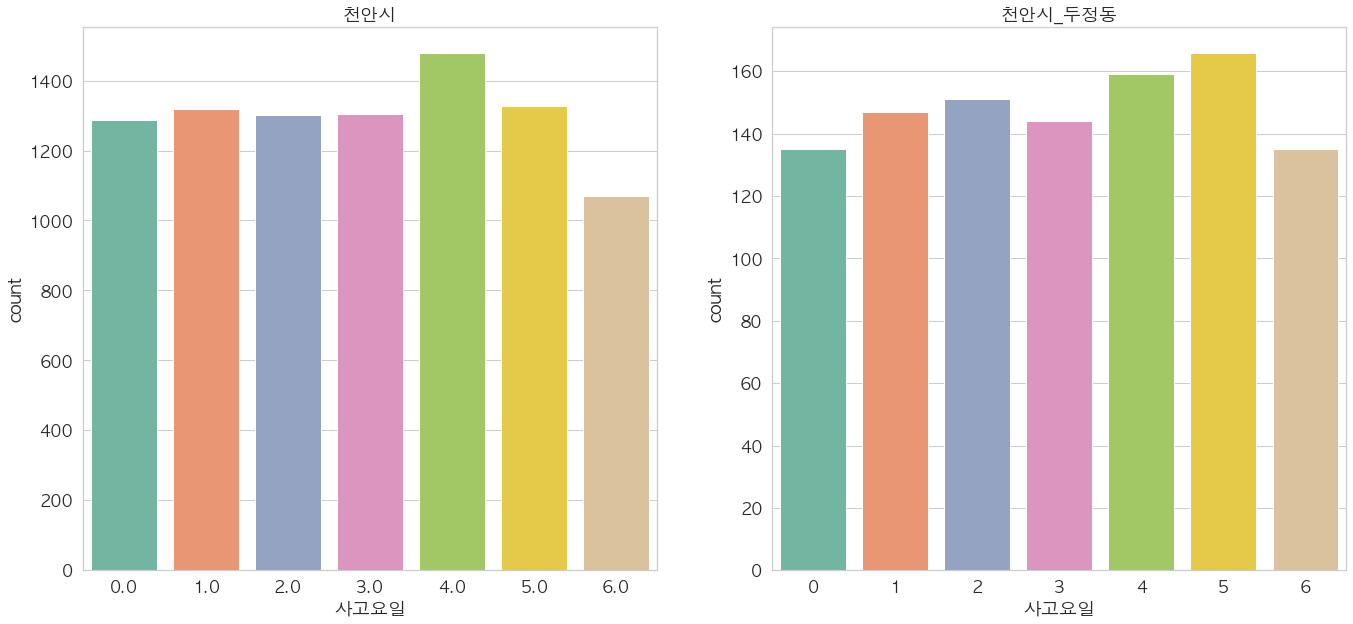

In [110]:
plt.figure(figsize=(35, 10))

plt.subplot(1, 3, 1)
plt.title('천안시')
sns.countplot(x=cds_c['사고일시'].dt.weekday, data=cds_c, palette='Set2')
plt.xlabel('사고요일')

plt.subplot(1, 3, 2)
plt.title('천안시_두정동')
sns.countplot(x=cds_d['사고일시'].dt.weekday, data=cds_d, palette='Set2')
plt.xlabel('사고요일')


Text(0.5, 0, '사고시간')

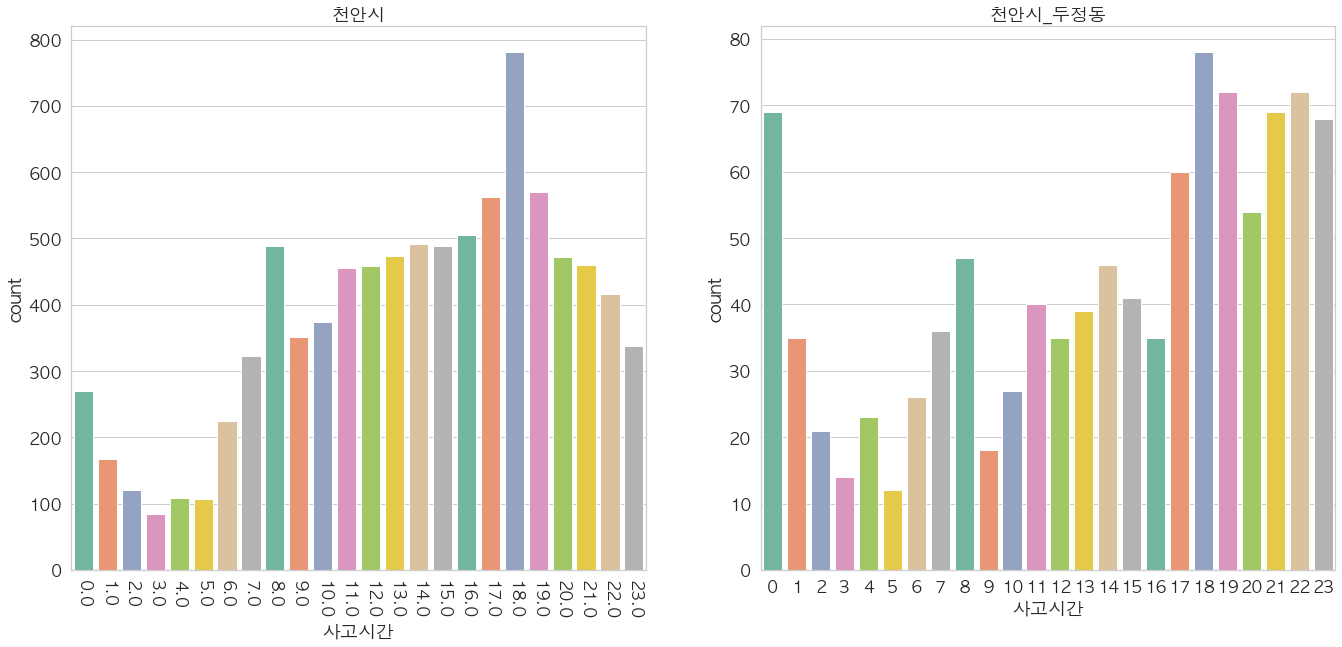

In [111]:
plt.figure(figsize=(35, 10))

plt.subplot(1, 3, 1)
plt.title('천안시')
sns.countplot(x=cds_c['사고일시'].dt.hour, data=cds_c, palette='Set2')
plt.xlabel('사고시간')
plt.xticks(rotation=-90)


plt.subplot(1, 3, 2)
plt.title('천안시_두정동')
sns.countplot(x=cds_d['사고일시'].dt.hour, data=cds_d, palette='Set2')
plt.xlabel('사고시간')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '차대사람 - 횡단중'),
  Text(1, 0, '차대차 - 정면충돌'),
  Text(2, 0, '차대차 - 측면충돌'),
  Text(3, 0, '차대차 - 추돌'),
  Text(4, 0, '차대사람 - 길가장자리구역통행중'),
  Text(5, 0, '차량단독 - 공작물충돌'),
  Text(6, 0, '차대차 - 기타'),
  Text(7, 0, '차대사람 - 기타'),
  Text(8, 0, '차대사람 - 차도통행중'),
  Text(9, 0, '차대사람 - 보도통행중'),
  Text(10, 0, '차대차 - 후진중충돌'),
  Text(11, 0, '차량단독 - 기타'),
  Text(12, 0, '차량단독 - 전도전복 - 전도')])

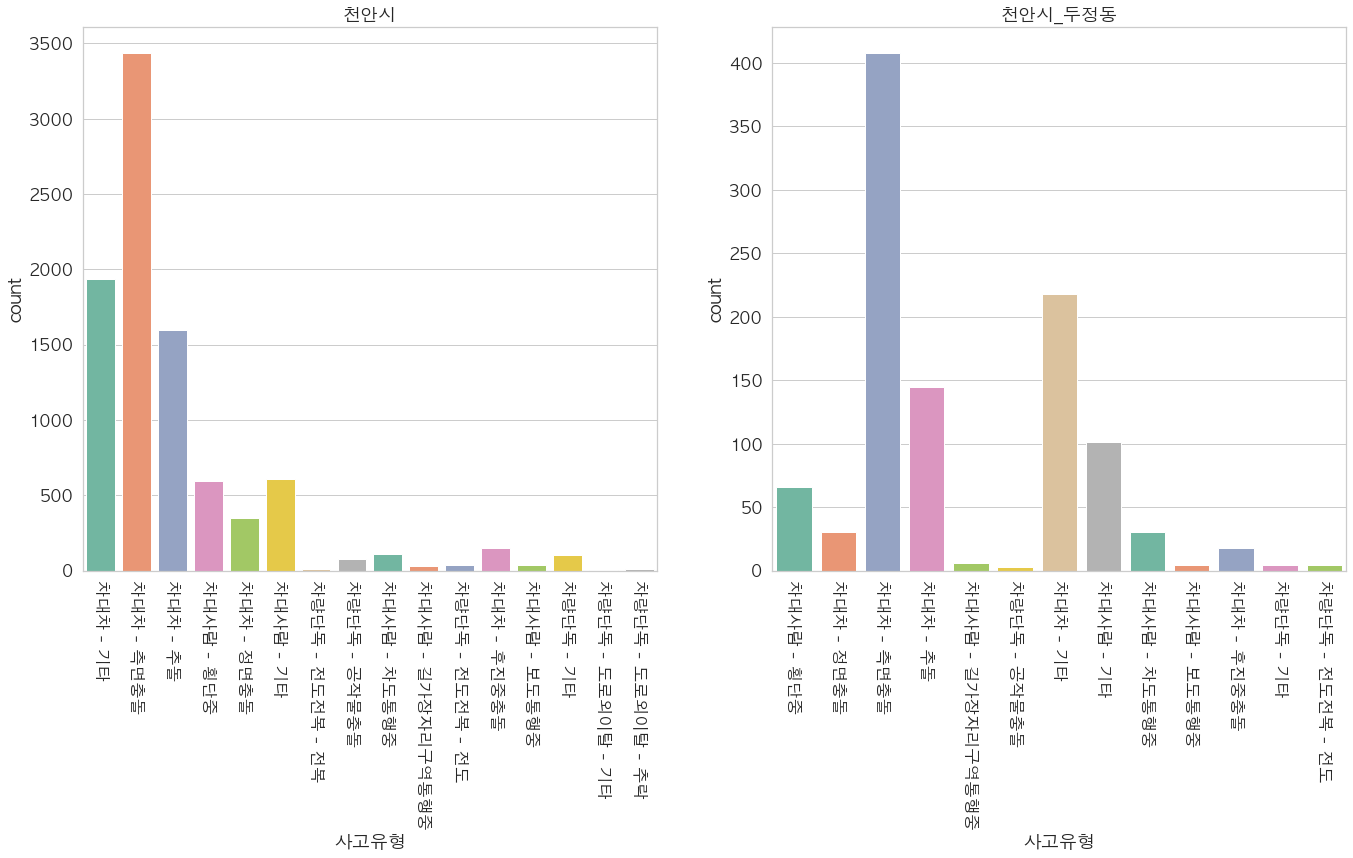

In [112]:
plt.figure(figsize=(35, 10))

plt.subplot(1, 3, 1)
plt.title('천안시')
sns.countplot(x='사고유형', data=cds_c, palette='Set2')
plt.xlabel('사고유형')
plt.xticks(rotation=-90)

plt.subplot(1, 3, 2)
plt.title('천안시_두정동')
sns.countplot(x='사고유형', data=cds_d, palette='Set2')
plt.xlabel('사고유형')
plt.xticks(rotation=-90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '차대사람 - 횡단중'),
  Text(1, 0, '차대차 - 정면충돌'),
  Text(2, 0, '차대차 - 측면충돌'),
  Text(3, 0, '차대차 - 추돌'),
  Text(4, 0, '차대사람 - 길가장자리구역통행중'),
  Text(5, 0, '차량단독 - 공작물충돌'),
  Text(6, 0, '차대차 - 기타'),
  Text(7, 0, '차대사람 - 기타'),
  Text(8, 0, '차대사람 - 차도통행중'),
  Text(9, 0, '차대사람 - 보도통행중'),
  Text(10, 0, '차대차 - 후진중충돌'),
  Text(11, 0, '차량단독 - 기타'),
  Text(12, 0, '차량단독 - 전도전복 - 전도')])

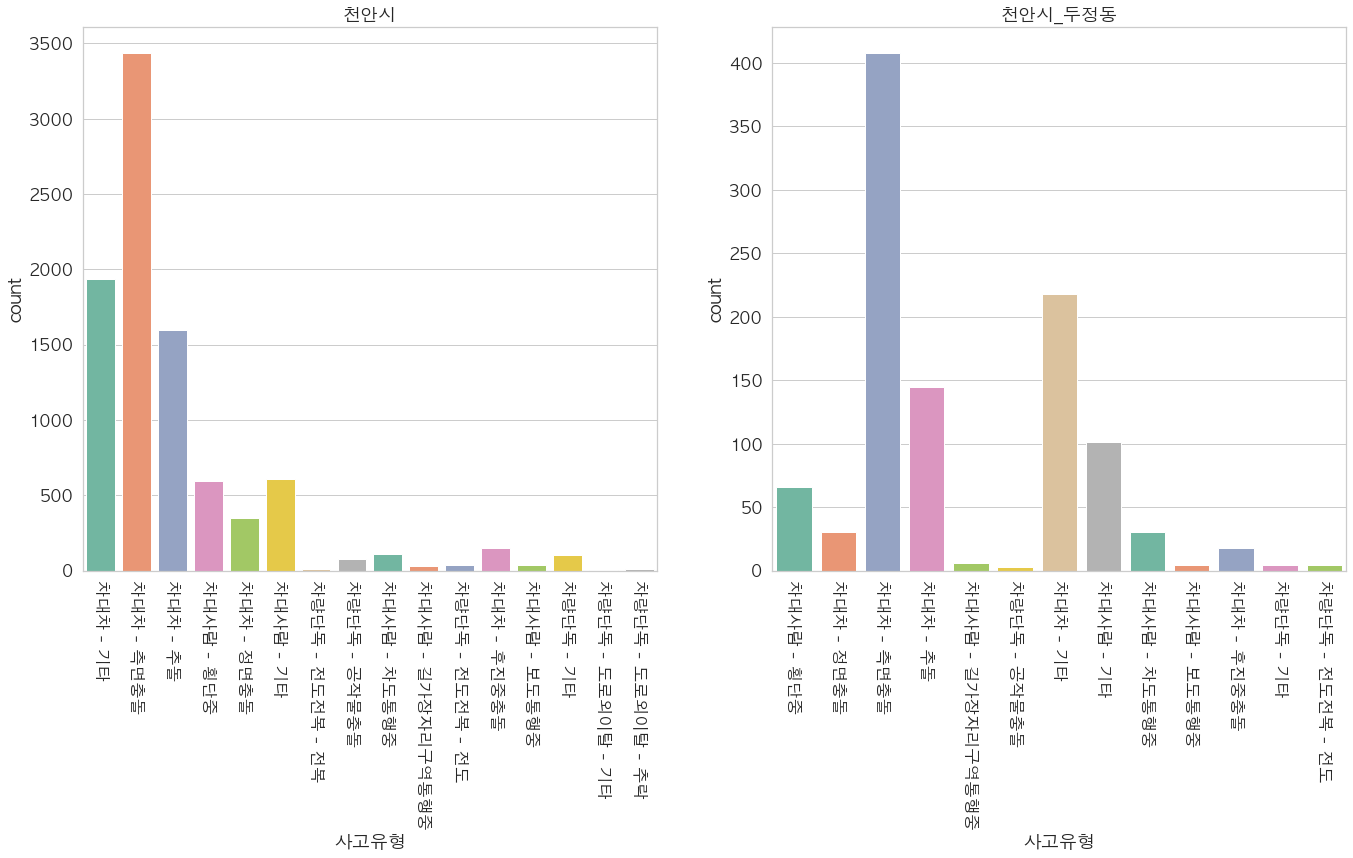

In [113]:
plt.figure(figsize=(35, 10))

plt.subplot(1, 3, 1)
plt.title('천안시')
sns.countplot(x='사고유형', data=cds_c, palette='Set2')
plt.xlabel('사고유형')
plt.xticks(rotation=-90)

plt.subplot(1, 3, 2)
plt.title('천안시_두정동')
sns.countplot(x='사고유형', data=cds_d, palette='Set2')
plt.xlabel('사고유형')
plt.xticks(rotation=-90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '승용'),
  Text(1, 0, '원동기'),
  Text(2, 0, '이륜'),
  Text(3, 0, '화물'),
  Text(4, 0, '승합'),
  Text(5, 0, '건설기계'),
  Text(6, 0, '자전거'),
  Text(7, 0, '사륜오토바이(ATV)'),
  Text(8, 0, '개인형이동수단(PM)'),
  Text(9, 0, '특수')])

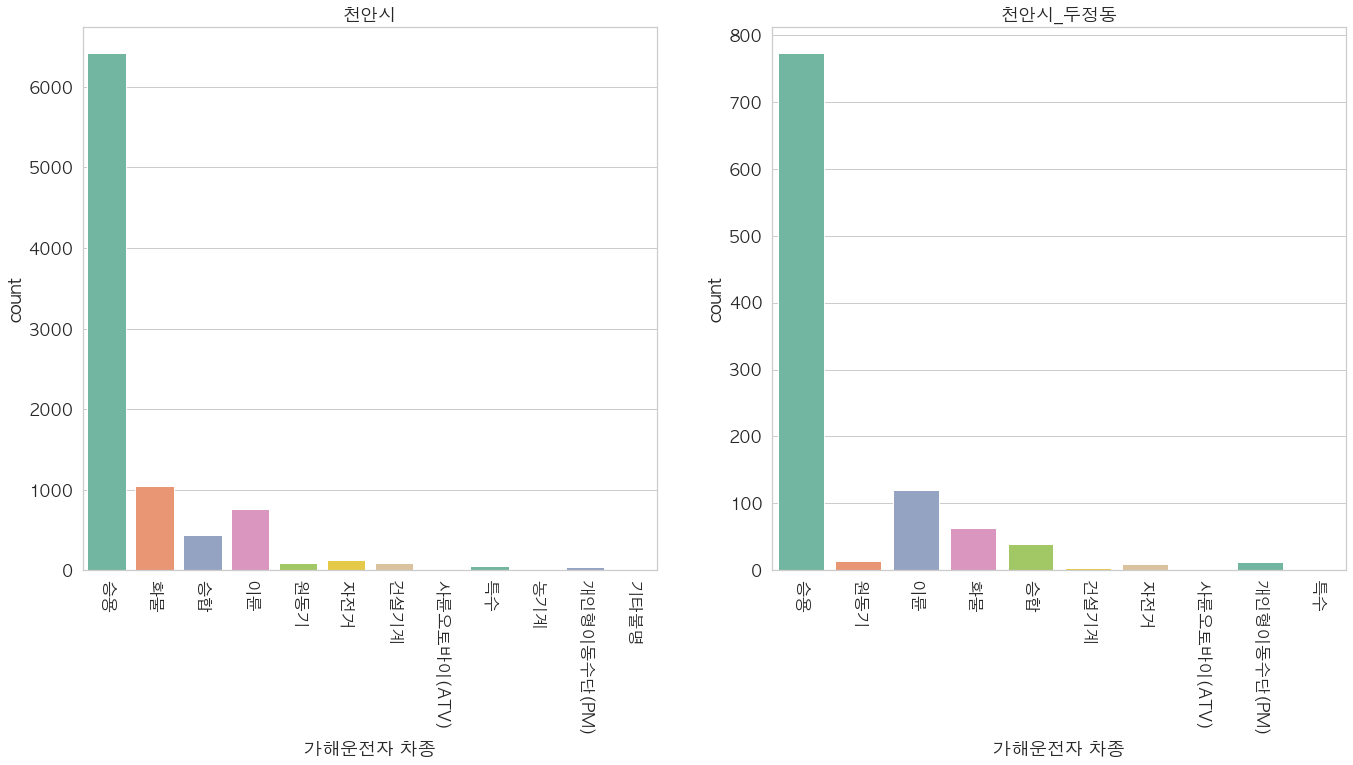

In [114]:
plt.figure(figsize=(35, 10))

plt.subplot(1, 3, 1)
plt.title('천안시')
sns.countplot(x='가해운전자 차종', data=cds_c, palette='Set2')
plt.xlabel('가해운전자 차종')
plt.xticks(rotation=-90)

plt.subplot(1, 3, 2)
plt.title('천안시_두정동')
sns.countplot(x='가해운전자 차종', data=cds_d, palette='Set2')
plt.xlabel('가해운전자 차종')
plt.xticks(rotation=-90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '보행자'),
  Text(1, 0, '승용'),
  Text(2, 0, '승합'),
  Text(3, 0, '자전거'),
  Text(4, 0, '원동기'),
  Text(5, 0, '화물'),
  Text(6, 0, '이륜'),
  Text(7, 0, '개인형이동수단(PM)'),
  Text(8, 0, '특수')])

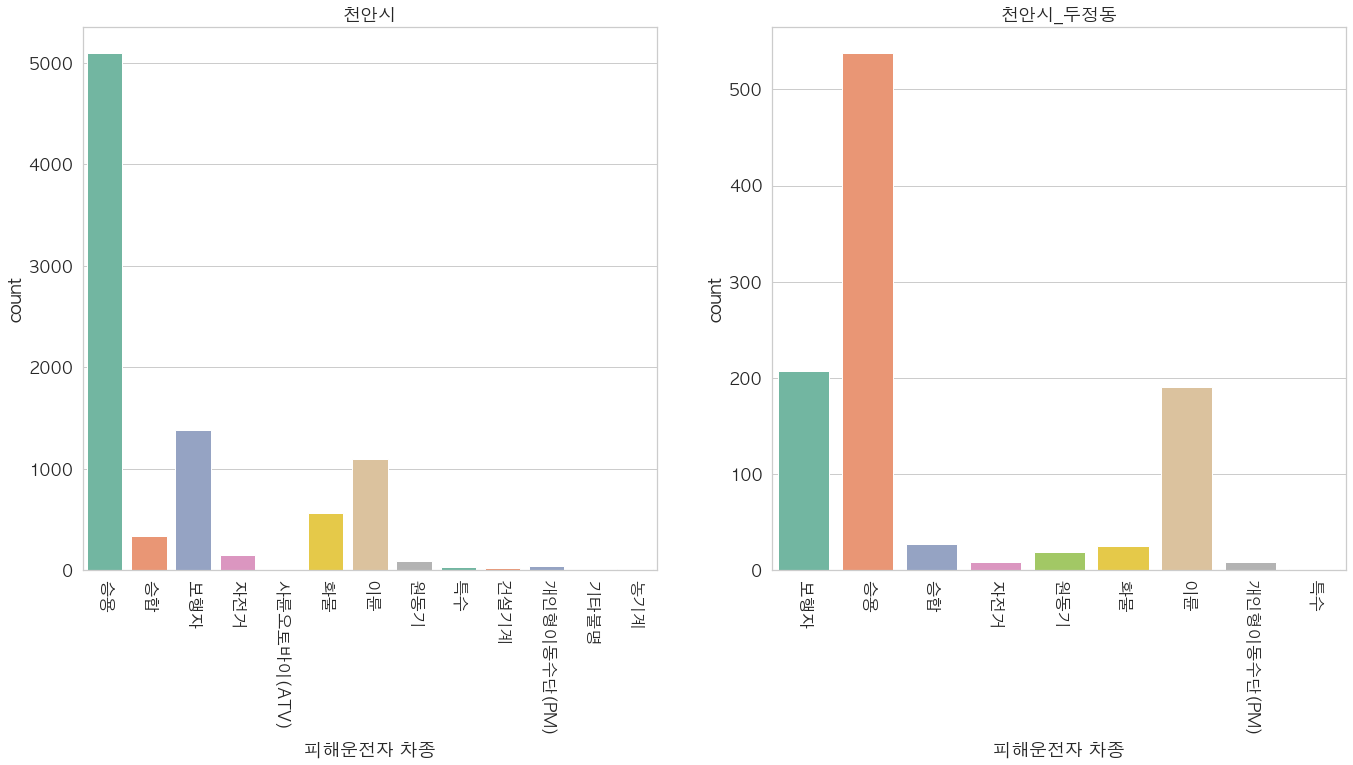

In [115]:
plt.figure(figsize=(35, 10))

plt.subplot(1, 3, 1)
plt.title('천안시')
sns.countplot(x='피해운전자 차종', data=cds_c, palette='Set2')
plt.xlabel('피해운전자 차종')
plt.xticks(rotation=-90)
/
plt.subplot(1, 3, 2)
plt.title('천안시_두정동')
sns.countplot(x='피해운전자 차종', data=cds_d, palette='Set2')
plt.xlabel('피해운전자 차종')
plt.xticks(rotation=-90)
